In [226]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os, os.path
import seaborn as sb

In [227]:
dataDir = "../server/data/"
files = []
completedf = pd.DataFrame(columns=["sample","movementType","elapsedTime","fsr_1","fsr_2","gyrox_1","gyroy_1","gyroz_1","gyrox_2","gyroy_2","gyroz_2","gyrox_3","gyroy_3","gyroz_3","gyrox_4","gyroy_4","gyroz_4","accelx_1","accely_1","accelz_1","accelx_2","accely_2","accelz_2","accelx_3","accely_3","accelz_3","accelx_4","accely_4","accelz_4"])
files = os.listdir(dataDir)
for i,file in enumerate(files):
    nameParts = file.split("_")
    curFilePD = pd.read_csv(dataDir + file, sep=" ", names=["elapsedTime","fsr_1","fsr_2","gyrox_1","gyroy_1","gyroz_1","gyrox_2","gyroy_2","gyroz_2","gyrox_3","gyroy_3","gyroz_3","gyrox_4","gyroy_4","gyroz_4","Gyrox_1","accely_1","accelz_1","accelx_2","accely_2","accelz_2","accelx_3","accely_3","accelz_3","accelx_4","accely_4","accelz_4"])
    movement = 1 if nameParts[1] == "correct" else 0 # 1 == CORRECT; 0 == WRONG
    series = curFilePD.assign(sample=pd.to_numeric(nameParts[2].split(".")[0]),movementType=pd.to_numeric(movement))
    df_temp= pd.DataFrame(series)
    completedf=pd.concat([completedf,df_temp], ignore_index=True) 


In [228]:
completedf.to_csv('complete_data_wo_accel.csv', index=False)

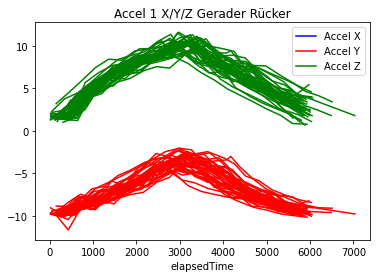

In [229]:

fig, ax1 = plt.subplots()
completedf.loc[(completedf["movementType"]==1)].groupby('sample').plot(x="elapsedTime",y=["accelx_1","accely_1","accelz_1"],ax=ax1,legend=None,title="Accel 1 X/Y/Z Gerader Rücker",color=['blue','red','green'])
ax1.legend(["Accel X","Accel Y","Accel Z"])


# Acceleration

<Figure size 144x576 with 0 Axes>

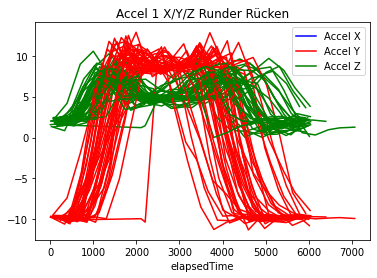

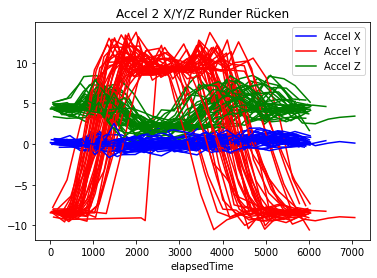

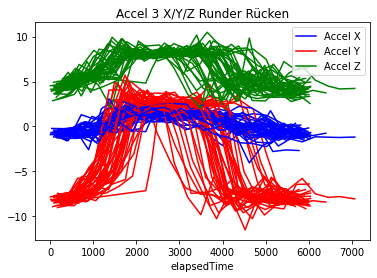

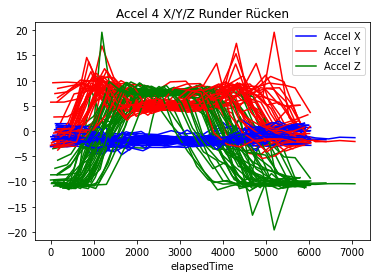

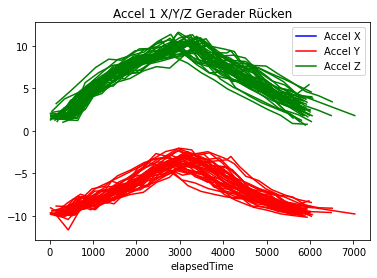

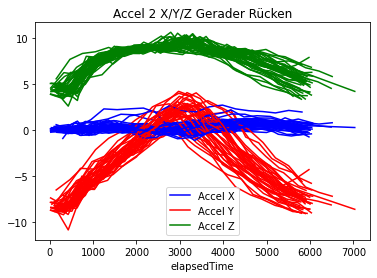

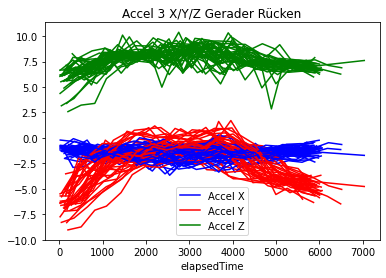

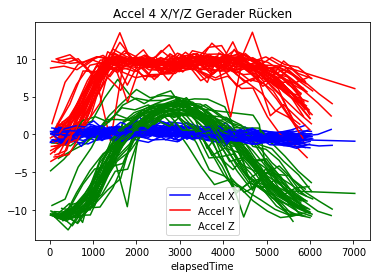

In [230]:
mainFig = plt.figure(figsize=(2, 8))
for j in range(2):
    for i in range(4):
        fig, ax = plt.subplots()
        movementTypeString =  "Gerader" if j == 1 else "Runder"
        completedf.loc[(completedf["movementType"]==j)].groupby('sample').plot(x="elapsedTime",y=[f"accelx_{i+1}",f"accely_{i+1}",f"accelz_{i+1}"],ax=ax,legend=None,title=f"Accel {i+1} X/Y/Z {movementTypeString} Rücken",color=['blue','red','green'])
        ax.legend(["Accel X","Accel Y","Accel Z"])

# Gyro

<Figure size 144x576 with 0 Axes>

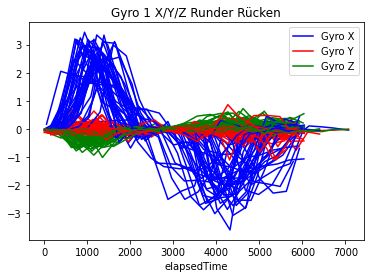

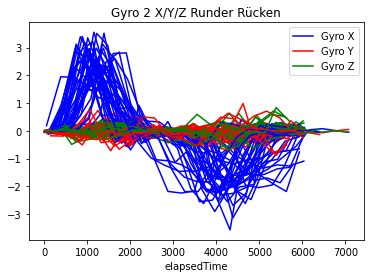

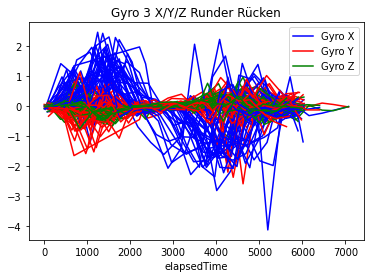

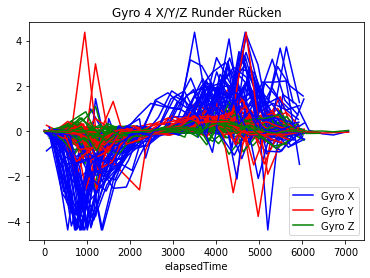

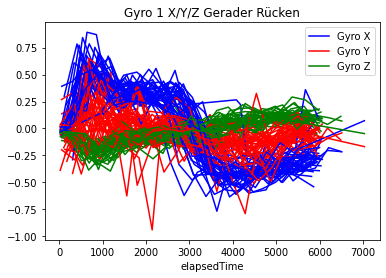

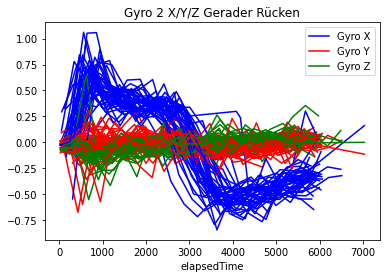

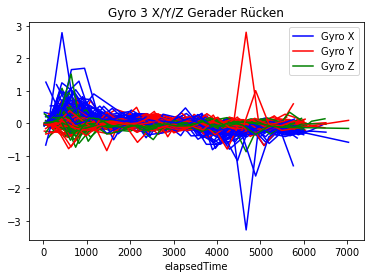

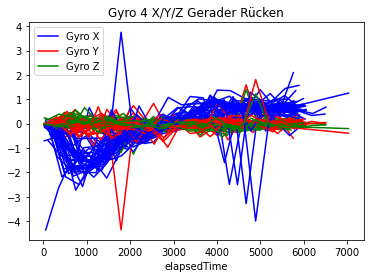

In [231]:
mainFig = plt.figure(figsize=(2, 8))
for j in range(2):
    for i in range(4):
        fig, ax = plt.subplots()
        movementTypeString =  "Gerader" if j == 1 else "Runder"
        completedf.loc[(completedf["movementType"]==j)].groupby('sample').plot(x="elapsedTime",y=[f"gyrox_{i+1}",f"gyroy_{i+1}",f"gyroz_{i+1}"],ax=ax,legend=None,title=f"Gyro {i+1} X/Y/Z {movementTypeString} Rücken",color=['blue','red','green'])
        ax.legend(["Gyro X","Gyro Y","Gyro Z"])

# FSR

<Figure size 144x576 with 0 Axes>

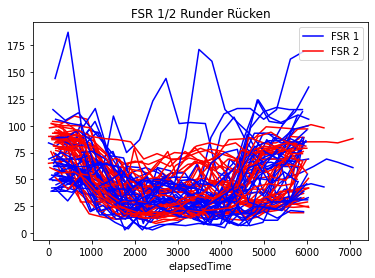

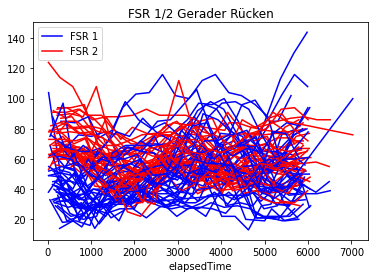

In [232]:
mainFig = plt.figure(figsize=(2, 8))
for j in range(2):
    fig, ax = plt.subplots()
    movementTypeString =  "Gerader" if j == 1 else "Runder"
    completedf.loc[(completedf["movementType"]==j)].groupby('sample').plot(x="elapsedTime",y=["fsr_1","fsr_2"],ax=ax,legend=None,title=f"FSR 1/2 {movementTypeString} Rücken",color=['blue','red'])
    ax.legend(["FSR 1","FSR 2"])